# FutureIntern Task 1 - Fraud Detection 

# 1.Business Understanding

The goal of this project is to accurately detect fraudulent transactions in a dataset of credit card transactions. By identifying these frauds, the model can assist financial institutions in flagging potentially harmful activities, protecting users from unauthorized access and reducing financial loss. Given that fraudulent transactions are often rare in such datasets, we’ll be focusing on handling this class imbalance effectively in the modeling process.

# 2. Data Understanding

This dataset includes a total of 284,807 transactions with 31 features:

Time: The seconds elapsed between this transaction and the first transaction in the dataset.

V1 - V28: The principal components obtained through a PCA transformation for confidentiality; they represent anonymized transaction features.

Amount: The transaction amount, which may be relevant for detecting unusual transaction sizes associated with fraud.

Class: The target variable, where 1 indicates a fraudulent transaction and 0 a non-fraudulent one.


#### Key observations from the summary statistics:

The Time feature ranges from 0 to around 172,792, suggesting a continuous recording of transactions over time.

The Amount feature varies widely, with an average of 88.35 but a maximum of 25,691.16, indicating that transaction amounts differ significantly, which could be relevant in identifying fraud.

The Class distribution shows that only around 0.17% of transactions are fraudulent, highlighting a strong class imbalance

In [1]:
import zipfile
import os

# Define the path to your ZIP file
zip_file_path = 'creditcard.csv.zip'  
extract_to_path = '/FutureIntern_DS_01/'   # Directory where files will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Check if files are extracted
extracted_files = os.listdir(extract_to_path)
print("Extracted Files:", extracted_files)


Extracted Files: ['.git', '.gitignore', '.ipynb_checkpoints', 'creditcard.csv', 'creditcard.csv.zip', 'FutureIntern_DS_01.ipynb', 'LICENSE', 'README.md']


In [2]:
import pandas as pd


csv_file_path = os.path.join(extract_to_path, 'creditcard.csv')  

# Load the dataset
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


# 3. Exploratory Data Analysis (EDA)

To gain more insights, we can carry out these analyses:

1. Class Distribution: Confirm the imbalance by visualizing the distribution of the target variable, Class, to see how many transactions are fraudulent.

2. Transaction Amount Analysis: Explore the distribution of Amount for fraudulent and non-fraudulent transactions to see if fraud transactions have unique characteristics regarding transaction size.

3. Time vs. Class: Check if fraudulent transactions occur more frequently during certain times by plotting Time against Class. This could reveal patterns in fraud activity over time.

4. Correlation Analysis: Examine the correlations between features V1 to V28 to see if any hidden structure can be useful for classification.

5. Data Distribution: Plot the distribution of the PCA components (V1 to V28). Given these are principal components, they should already be standardized, but it’s good to confirm this visually.

6. Anomaly Detection Insights: Given the rarity of fraudulent transactions, we can also look at each feature's statistical profile for fraud vs. non-fraud transactions to identify any anomalies.

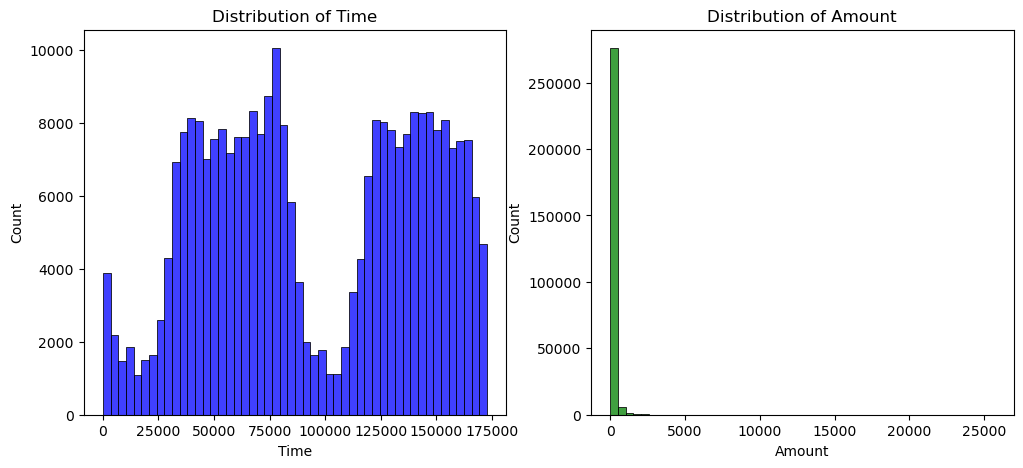

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Time and Amount
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, color='blue')
plt.title('Distribution of Time')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, color='green')
plt.title('Distribution of Amount')
plt.show()


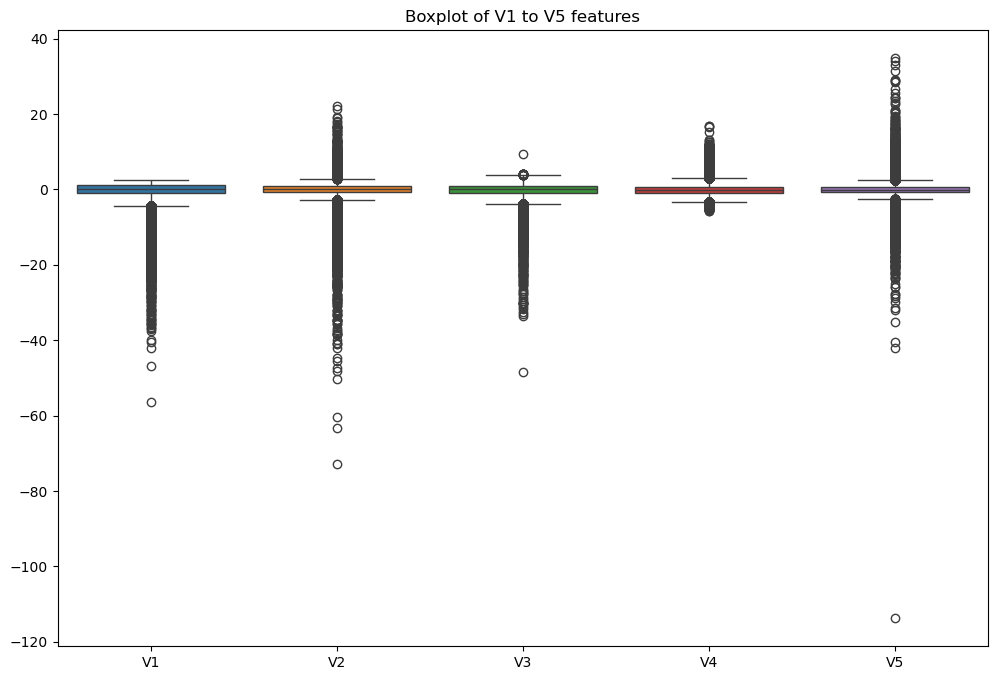

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['V1', 'V2', 'V3', 'V4', 'V5']])  
plt.title('Boxplot of V1 to V5 features')
plt.show()


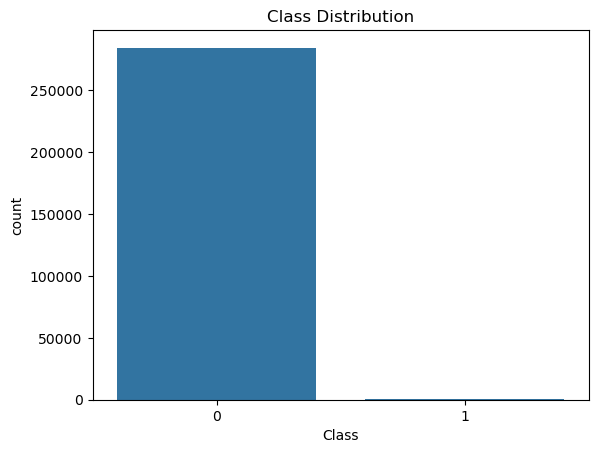

In [7]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


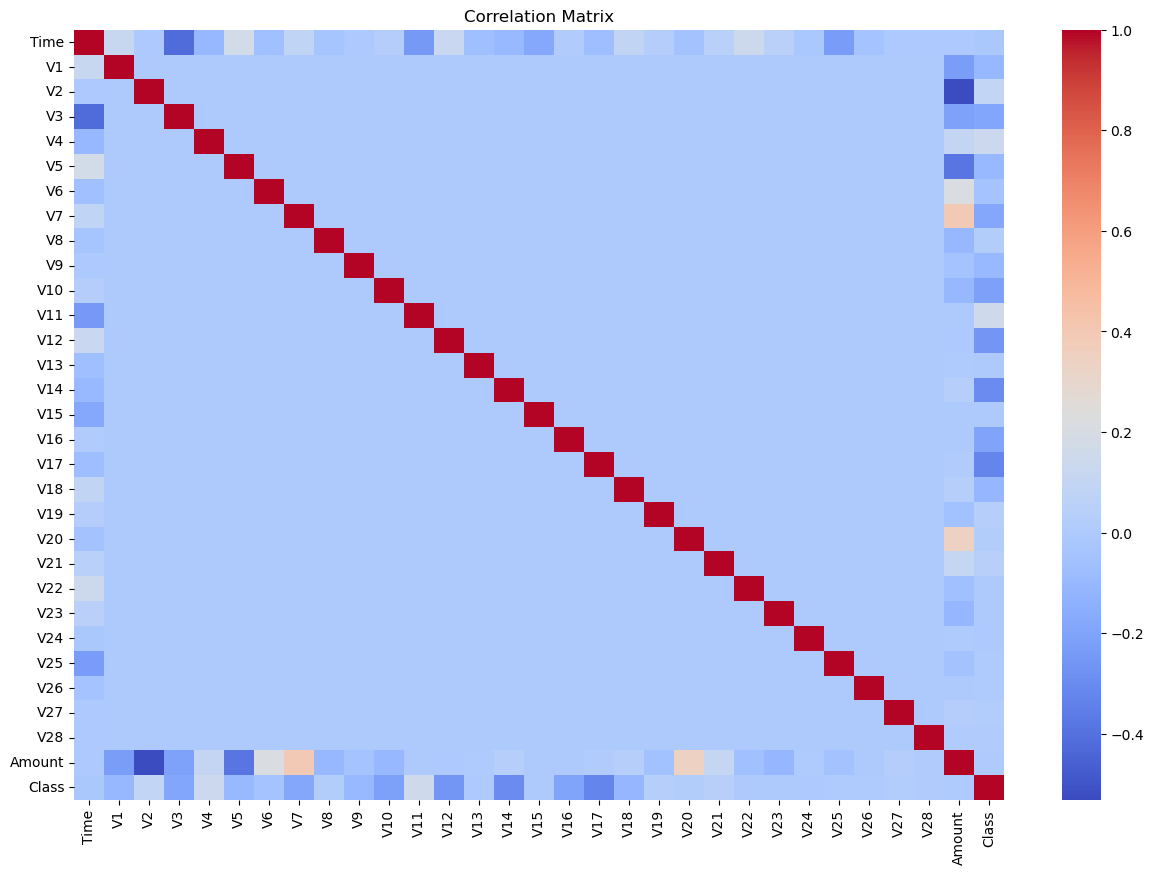

In [8]:
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


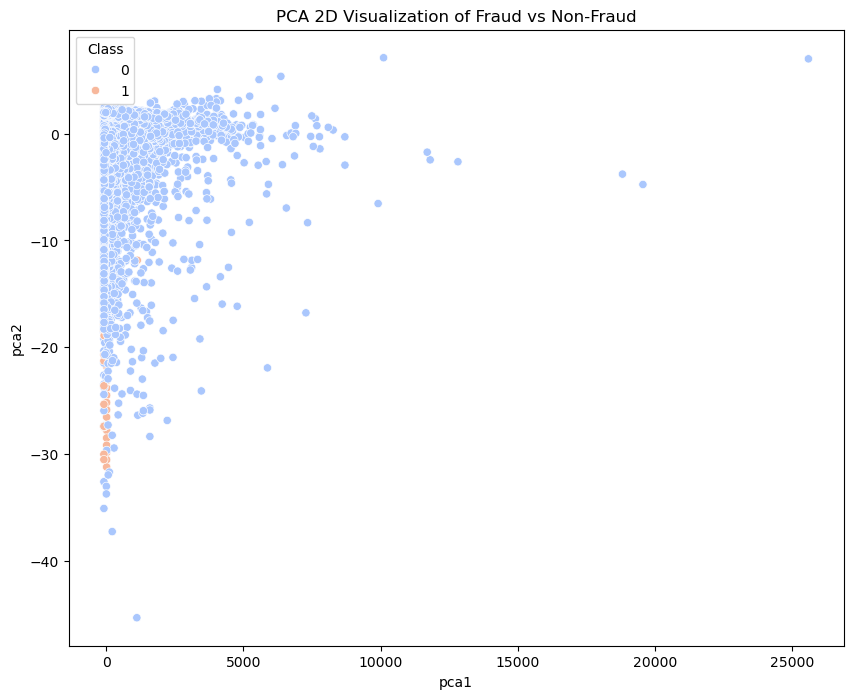

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, 1:-1])  # Excluding 'Time', 'Class'
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='Class', data=df, palette='coolwarm')
plt.title('PCA 2D Visualization of Fraud vs Non-Fraud')
plt.show()


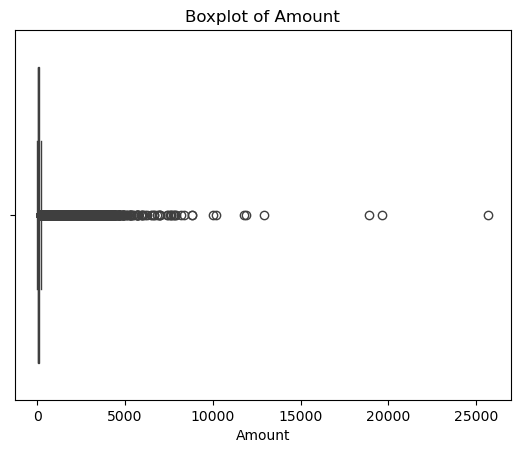

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in 'Amount' column
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()


In [11]:
import numpy as np
# Log transform 'Amount'
df['Amount_log'] = np.log1p(df['Amount'])  # Using log1p to handle zeros

# Optionally, drop the original 'Amount' column
data = df.drop('Amount', axis=1)


# 4. Data Preprocessing and Feature Engineering

1. Standardization: Applied scaling to the Amount feature to bring it to the same scale as other features.

2. Train-Test Split: Divided data into training and test sets, stratifying by the target variable to maintain class distribution.

3. Handling Imbalance: Used Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes in the training set, generating synthetic examples for the minority class (fraud). 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Class', axis=1))


Class
0    284315
1       492
Name: count, dtype: int64


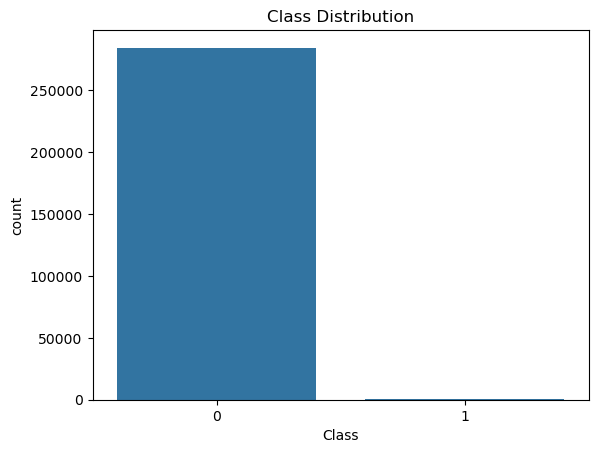

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Check for class imbalance
print(df['Class'].value_counts())

# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


In [14]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(y_resampled.value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


# 5. Modeling

Baseline Model (Logistic Regression): Established a baseline using logistic regression. Due to the class imbalance, it showed a high accuracy but low precision and recall for fraud cases.


Advanced Models: Implemented a range of models to improve fraud detection:

Random Forest with class weight adjustments.

Neural Network model to capture complex patterns in the data.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X = data.drop(columns=['Class'])
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)




In [17]:


# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)


#### Baseline Model- Logistic regression

In [18]:
# Logistic Regression with class weight adjustment
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_sm, y_train_sm)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print("Logistic Regression Metrics")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Metrics
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.85      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443

ROC AUC Score: 0.9664931565013632


#### Random forest model 

In [19]:
# Random Forest with class weight adjustment
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("Random Forest Metrics")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.58      0.84      0.69       148

    accuracy                           1.00     85443
   macro avg       0.79      0.92      0.84     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.974864183604438


#### Neural Network model

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', 
                      learning_rate_init=0.001, max_iter=20, batch_size=64, random_state=42)

# Train the model
model.fit(X_train_sm, y_train_sm)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the ROC AUC score

# Display metrics
print("Neural Network Metrics")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


C:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.58      0.77      0.66       148

    accuracy                           1.00     85443
   macro avg       0.79      0.88      0.83     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9589057373218226



# 6. Evaluation Metrics

Metrics Used: Accuracy, Precision, Recall, F1-score, and Area Under the ROC Curve (AUC-ROC).

Threshold Adjustment: Adjusted decision thresholds to improve the recall rate for fraud detection, since detecting more fraudulent cases (even at the cost of some false positives) was prioritized.


Best Results:

Random Forest: Achieved high recall and F1 scores for fraud cases, indicating strong performance.

Neural Network: Also achieved promising results, though slightly less effective than the random forest.

# 7. Results

Logistic Regression: Provided a strong baseline with an AUC-ROC of ~0.97.

Random Forest: Achieved the highest recall for fraud cases, with an AUC-ROC of ~0.97, indicating robust fraud detection capabilities.

Neural Network: Showed a slightly lower AUC-ROC than the Random Forest but was still effective for detecting fraudulent cases.

# 8. Visualization of Model Performance

ROC and Precision-Recall Curves: Plotted to compare model performance visually, showing the trade-offs between precision and recall across models.

Confusion Matrix: Highlighted the number of true positives, false positives, false negatives, and true negatives to assess each model’s ability to detect fraud.

C:\Users\BENNLANGAT\anaconda3\envs\learn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


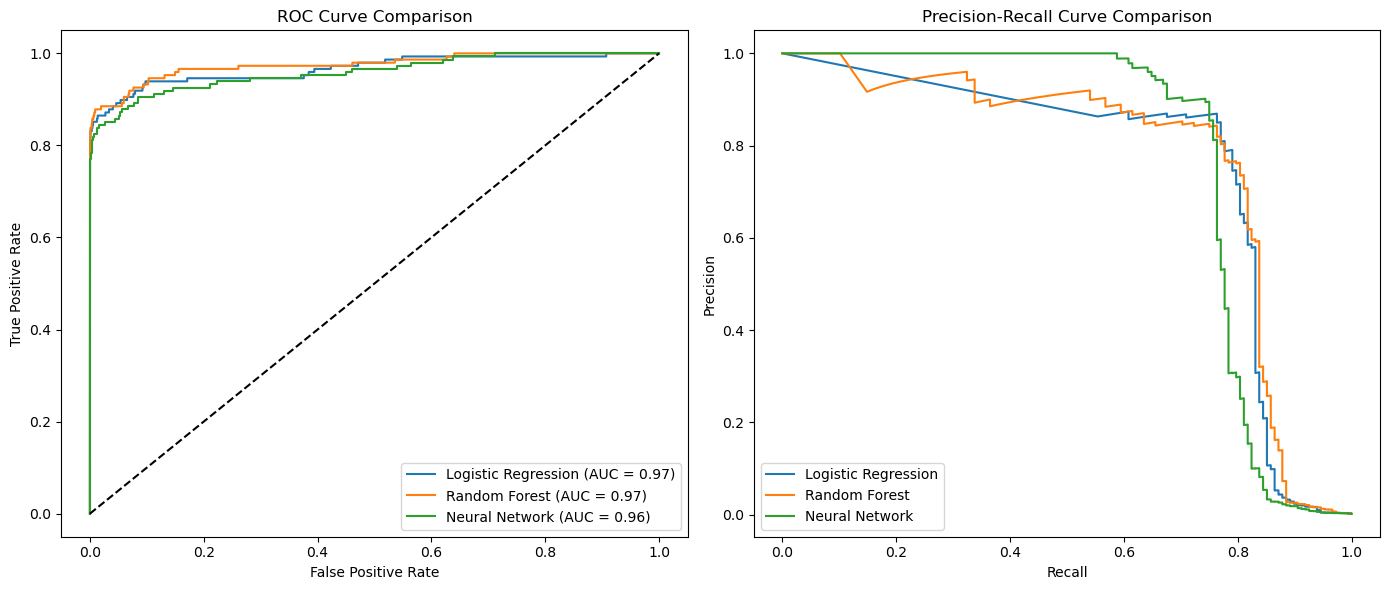

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt



# Fit each model
log_reg.fit(X_train_sm, y_train_sm)
rf.fit(X_train_sm, y_train_sm)
model.fit(X_train_sm, y_train_sm)

# Get prediction probabilities for ROC and PR curves
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_nn = model.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# Compute AUC
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')

# Compute Precision-Recall curves
prec_log_reg, rec_log_reg, _ = precision_recall_curve(y_test, y_prob_log_reg)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
prec_nn, rec_nn, _ = precision_recall_curve(y_test, y_prob_nn)

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
plt.plot(rec_log_reg, prec_log_reg, label='Logistic Regression')
plt.plot(rec_rf, prec_rf, label='Random Forest')
plt.plot(rec_nn, prec_nn, label='Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


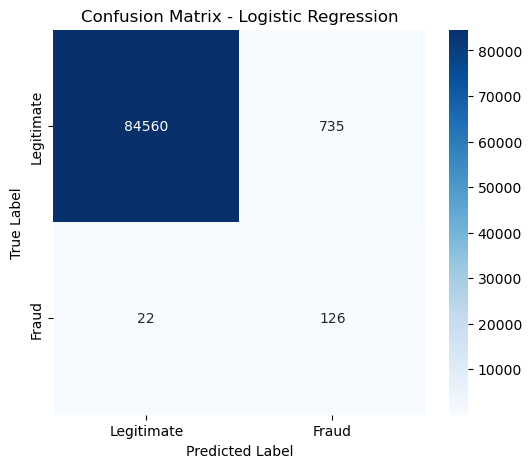

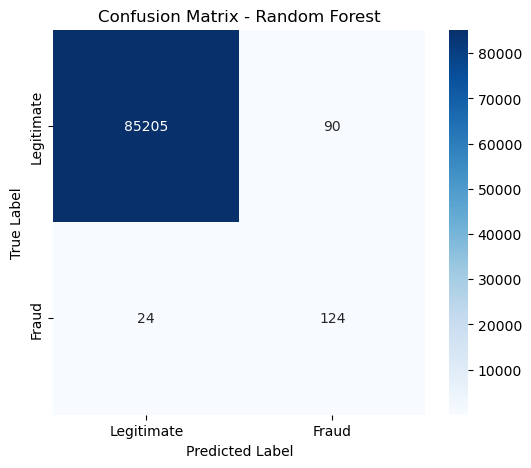

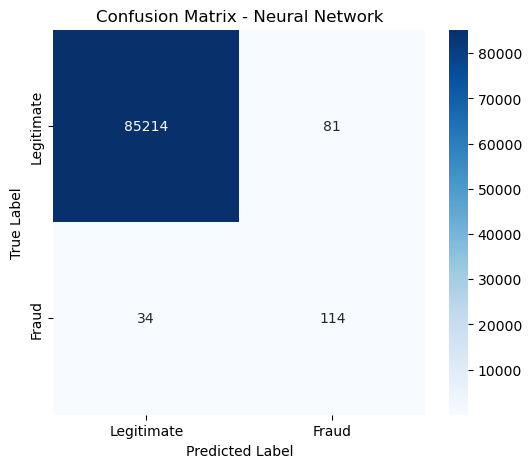

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# 1. Predictions for each model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_model = model.predict(X_test)

# 2. Confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_nn = confusion_matrix(y_test, y_pred_model)

# 3. Plotting function for consistency
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Fraud"], yticklabels=["Legitimate", "Fraud"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# 4. Plot each model's confusion matrix
plot_confusion_matrix(conf_matrix_log_reg, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(conf_matrix_rf, "Confusion Matrix - Random Forest")
plot_confusion_matrix(conf_matrix_nn, "Confusion Matrix - Neural Network")


# 9. Conclusion

Best Model: The Random Forest model with class weight adjustment provided the best balance of precision and recall for detecting fraudulent transactions.

Insights: Adjusting the threshold improved fraud detection without significantly increasing false positives. Using SMOTE effectively handled the data imbalance, leading to better model performance.


Future Work: Explore deep learning architectures, such as Convolutional Neural Networks (CNNs) or Autoencoders, for anomaly detection in fraud detection tasks.